In [ ]:
'''
prob: phân loại các điểm trong không gian 2 chiều
data: 20 obs

input: x1, x1
output: y_h
method: logistic regression
'''

khởi tạo dữ liệu theo phân phối cho trước (mean, std)

In [1]:
from __future__ import division, print_function, unicode_literals
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

In [2]:
# generate a list of random data points
np.random.seed(22)
means = [[2, 2], [4, 2]]
cov = [[.7, 0], [0, .7]]
N = 20
X1 = np.random.multivariate_normal(means[0], cov, N)
X2 = np.random.multivariate_normal(means[1], cov, N)

In [6]:
print(X1.shape)
X1

(20, 2)


array([[ 1.92306918,  0.775673  ],
       [ 2.90509186,  1.7997662 ],
       [ 1.58909188,  1.16143907],
       [ 2.76874122,  1.07663514],
       [ 2.52416203,  1.53020387],
       [ 2.02414192,  1.80692632],
       [ 2.49174878,  2.62943405],
       [ 1.11439322,  2.88348991],
       [ 2.62561276,  2.89077234],
       [ 3.27183166,  0.75454543],
       [ 3.55617919,  0.66250438],
       [ 1.45945603,  2.28222634],
       [ 2.87575608,  2.52637908],
       [ 2.30375703,  2.46497356],
       [ 1.08925412,  2.01982447],
       [ 4.09096119, -0.08330889],
       [ 1.80350003,  1.91837255],
       [ 1.25827634,  1.8856175 ],
       [ 2.08532169,  1.79005729],
       [ 1.9340609 ,  1.09208652]])

visualize

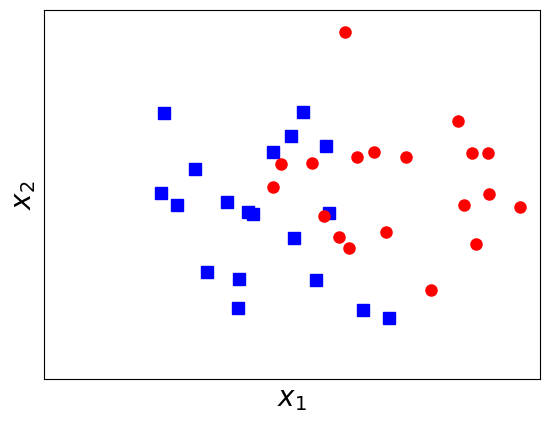

In [4]:
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 8, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 8, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide ticks
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)

# save the figure to an image first
plt.savefig('logistic_2d.png', bbox_inches='tight', dpi = 300)
plt.show()

xây dựng hàm sigmoid, hàm hồi quy  logistic

In [10]:
def sigmoid(s):
    return 1/(1 + np.exp(-s))

def logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count = 10):
# method to calculate model logistic regression by Stochastic Gradient Descent method
# eta: learning rate; tol: tolerance; max_count: maximum iterates
    w = [w_init]
    it = 0
    N = X.shape[1]
    d = X.shape[0]
    count = 0
    check_w_after = 20
    # loop of stochastic gradient descent
    while count < max_count:
        # shuffle the order of data (for stochastic gradient descent)
        # and put into mix_id
        mix_id = np.random.permutation(N)
        print(mix_id)
        for i in mix_id:
            xi = X[:, i].reshape(d, 1)
            print(xi.shape)
            yi = y[i]
            zi = sigmoid(np.dot(w[-1].T, xi)) # zi = h_theta(x) = g(theta^T * c)
            w_new = w[-1] + eta*(yi - zi)*xi
            count += 1
            # stopping criteria
            if count%check_w_after == 0:
                if np.linalg.norm(w_new - w[-check_w_after]) < tol:
                    return w
            w.append(w_new)
    return w

chuẩn bị dữ liệu, tìm bộ tham số tối ưu

In [8]:
X = np.concatenate((X1, X2), axis = 0).T
y = np.concatenate((np.zeros((1, N)), np.ones((1, N))), axis = 1).T

# Xbar
X = np.concatenate((np.ones((1, 2*N)), X), axis = 0)
eta = 0.05
d = X.shape[0]
w_init = np.random.randn(d, 1) # initialize parameters w = w_init

In [24]:
y.shape

(40, 1)

In [7]:
# call logistic_sigmoid_regression procedure
w = logistic_sigmoid_regression(X, y, w_init, eta, tol = 1e-4, max_count= 10000)

# print out the parameter
print(w[-1])

[[-9.51043127]
 [ 2.25978315]
 [ 1.42588178]]


visualize kết quả

In [8]:
# make data
x1m = np.arange(-1, 6, 0.025) # generate data coord. X1
xlen = len(x1m)
x2m = np.arange(0, 4, 0.025) # generate data coord. X2
x2en = len(x2m)
x1m, x2m = np.meshgrid(x1m, x2m) # create mesh grid X = (X1, X2)

# now assign the parameter w0, w1, w2 from array w which was computed above
w0 = w[-1][0][0]
w1 = w[-1][1][0]
w2 = w[-1][2][0]

# calculate probability zm=P(c|x)=sigmoid(w^Tx)=sigmoid(w0+w1*x1m+w2*x2m)
zm = sigmoid(w0 + w1*x1m + w2*x2m)

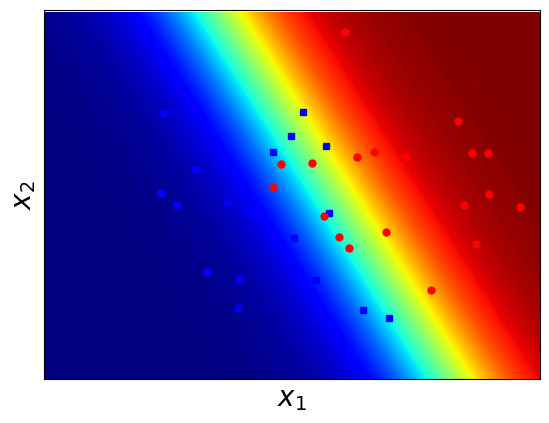

In [9]:
# plot contour of prob. zm by the saturation of blue and red
# more red <=> prob. that data point belong to red class is higher 
# & vise versa
CS = plt.contourf(x1m, x2m, zm, 200, cmap='jet')

# finally, plot the data and take a look
plt.plot(X1[:, 0], X1[:, 1], 'bs', markersize = 5, alpha = 1)
plt.plot(X2[:, 0], X2[:, 1], 'ro', markersize = 5, alpha = 1)
plt.axis('equal')
plt.ylim(0, 4)
plt.xlim(0, 5)

# hide ticks
cur_axes = plt.gca()
cur_axes.axes.get_xaxis().set_ticks([])
cur_axes.axes.get_yaxis().set_ticks([])
plt.xlabel('$x_1$', fontsize = 20)
plt.ylabel('$x_2$', fontsize = 20)
plt.savefig('logistic_2d_2.png', bbox_inches='tight', dpi = 300)
plt.show()